<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [8]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [9]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [10]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

array([[<AxesSubplot:title={'center':'RM'}>]], dtype=object)

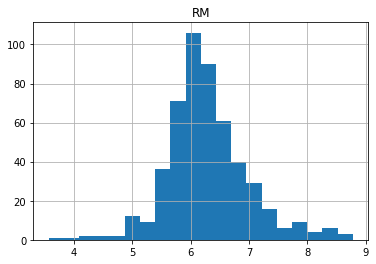

In [13]:
#  ANSWER
data.hist(column='RM', bins=20)

##### 2. Plot Histogram of `MEDV`

array([[<AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

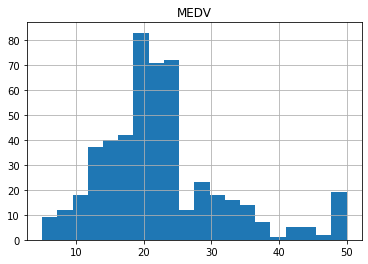

In [14]:
# ANSWER
data.hist(column='MEDV', bins=20)

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

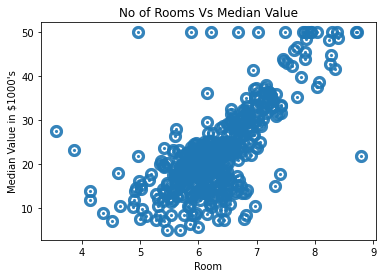

In [15]:
# ANSWER
plt.scatter(data['RM'], data['MEDV'], linewidths=10, alpha=0.9, s=10.0)
plt.title("No of Rooms Vs Median Value")
plt.xlabel("Room")
plt.ylabel("Median Value in $1000's")
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:**: ...

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [16]:
# ANSWE
alpha = 0.05


##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than or equal to 6 rooms.

Take sample of 100 house in each dataste.

In [17]:
#ANSWER
def get_house_size(x):
    if x <= 6:
        return 'Small House'
    else :
        return 'Large House'

data['RM_category'] = data.RM.apply(get_house_size)

Big_house = data[(data['RM_category'] == 'Large House')]
Small_house = data[(data['RM_category'] == 'Small House')]

BigHouse_sample = Big_house.sample(100)
SmallHouse_sample = Small_house.sample(100)


In [18]:
# BigHouse = data['RM'][data[data]]

In [19]:
BigHouse_sample.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.716852,11.185000,10.055800,0.08000,0.543957,6.610550,65.794000,3.722280,9.120000,387.810000,18.280000,358.875000,10.463600,24.905000
std,5.681391,21.330807,6.654666,0.27266,0.102817,0.597448,27.561922,1.936005,8.530729,168.204523,2.144667,95.628664,5.648251,9.612916
min,0.009060,0.000000,1.320000,0.00000,0.394000,6.004000,6.600000,1.169100,1.000000,188.000000,13.000000,6.680000,1.920000,7.500000
25%,0.066450,0.000000,4.380000,0.00000,0.457250,6.173500,43.950000,2.130275,4.000000,270.000000,16.900000,377.715000,5.877500,19.125000
50%,0.216250,0.000000,7.625000,0.00000,0.520000,6.431000,70.800000,3.062750,5.000000,307.000000,18.400000,393.160000,8.590000,22.900000
75%,2.243898,20.000000,18.100000,0.00000,0.616500,6.813000,90.125000,5.400700,8.000000,437.000000,20.200000,396.900000,14.135000,29.450000
max,37.661900,100.000000,25.650000,1.00000,0.871000,8.780000,100.000000,10.710300,24.000000,666.000000,21.200000,396.900000,25.790000,50.000000


In [20]:
SmallHouse_sample.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.803597,5.465000,13.710800,0.060000,0.590030,5.637390,75.241000,3.254948,12.080000,461.740000,19.318000,339.455900,17.316600,17.779000
std,9.734158,17.092478,6.442466,0.238683,0.116051,0.409579,25.835904,2.133212,9.631262,174.639694,1.724299,108.487136,7.524297,6.461921
min,0.013600,0.000000,1.690000,0.000000,0.392000,4.138000,9.800000,1.129600,1.000000,188.000000,14.700000,2.600000,3.260000,5.600000
25%,0.134810,0.000000,8.140000,0.000000,0.513750,5.568000,58.050000,1.748325,4.000000,307.000000,18.775000,347.137500,12.032500,14.175000
50%,0.738030,0.000000,18.100000,0.000000,0.583500,5.798500,88.300000,2.425900,5.000000,407.000000,20.200000,389.140000,15.700000,18.550000
75%,8.398468,0.000000,18.100000,0.000000,0.670750,5.888250,95.625000,3.958575,24.000000,666.000000,20.200000,396.900000,19.960000,20.400000
max,51.135800,80.000000,25.650000,1.000000,0.871000,5.998000,100.000000,10.710300,24.000000,666.000000,22.000000,396.900000,37.970000,50.000000


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

(array([19., 16., 13., 12.,  9.,  8.,  3.,  5.,  2.,  2.,  2.,  1.,  2.,
         2.,  0.,  0.,  2.,  0.,  0.,  2.]),
 array([6.004 , 6.1428, 6.2816, 6.4204, 6.5592, 6.698 , 6.8368, 6.9756,
        7.1144, 7.2532, 7.392 , 7.5308, 7.6696, 7.8084, 7.9472, 8.086 ,
        8.2248, 8.3636, 8.5024, 8.6412, 8.78  ]),
 <BarContainer object of 20 artists>)

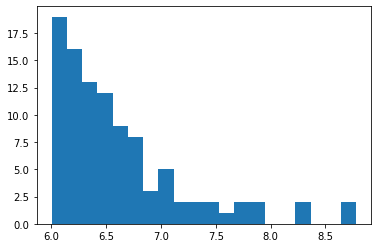

In [21]:
# ANSWER
plt.hist(BigHouse_sample['RM'], bins=20)


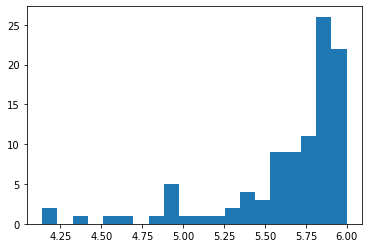

In [22]:
plt.hist(SmallHouse_sample['RM'], bins=20);

##### 7. Calculate Variance

Calculate variance for both samples.

In [23]:
# ANSWER
## Calculate the variance to get the standard deviation
a = BigHouse_sample['MEDV']
b = SmallHouse_sample['MEDV']
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)



In [24]:
print(var_a)
print(var_b)


92.40815656565655
41.75642323232322


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [25]:
# ANSWER
import statistics
## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2) 
s

8.190377884993456

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [26]:
# ANSWER
N=100
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
t

6.152149502121985

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [28]:
# ANSWER
## Degrees of freedom
df = 2*N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [29]:
# ANSWER
## Compare with the critical t-value


#p-value after comparison with the t 
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) 
else:
    p = stats.t.cdf(t, df = df)
    
print("t = " + str(t))
print("p = " + str(2*p))

t = 6.152149502121985
p = 4.156606170369059e-09


In [30]:
p = 1 - stats.t.cdf(abs(t), df=df)  # #p-value after comparison with the t 
print("t = " + str(t))
print("p = " + str(2 * p))

t = 6.152149502121985
p = 4.156606170369059e-09


#### Interpret results

##### 12. Generalise the above - Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [156]:
# ANSWER
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

In [157]:
# ANSWER
print_sig(p, alpha)

We reject our null hypothesis.


In [0]:
# ANSWER

##### 13. [Bonus] Generalise the above - Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [158]:
# ANSWER
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 6.0597686347963915
p = 6.76258017039416e-09
We reject our null hypothesis.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



